In [11]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
# Tratamiento de datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../../")
from src.soporte_graficas import (
    boxplot_scaler
)
import pickle

In [12]:
df = pd.read_pickle("../../../datos/02_regresiones/cluster_1/03_datos_encoded.pkl")
df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority
69145,21.371083,13.103566,39.990019,39.990019,7.577899,4.469043,2,0.0,0.84,0.73,11.210984


# Usamos Robust Scaler
Queremos que los outliers tengan importancia

In [13]:
df.columns

Index(['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [14]:
cols_escalar = ['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category','Quantity', 'Discount', 'Shipping Cost', 'Order Priority']
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[cols_escalar])
df_c = pd.DataFrame(datos_transf_robust,columns=df[cols_escalar].columns)
df.drop(columns=cols_escalar, inplace=True)
df = pd.concat([df_c,df],axis=1)

### Guardar scaler

In [15]:
with open("../../../datos/03_encoders/robust_scaler.pkl","wb") as f:
    pickle.dump(escalador_robust, f)

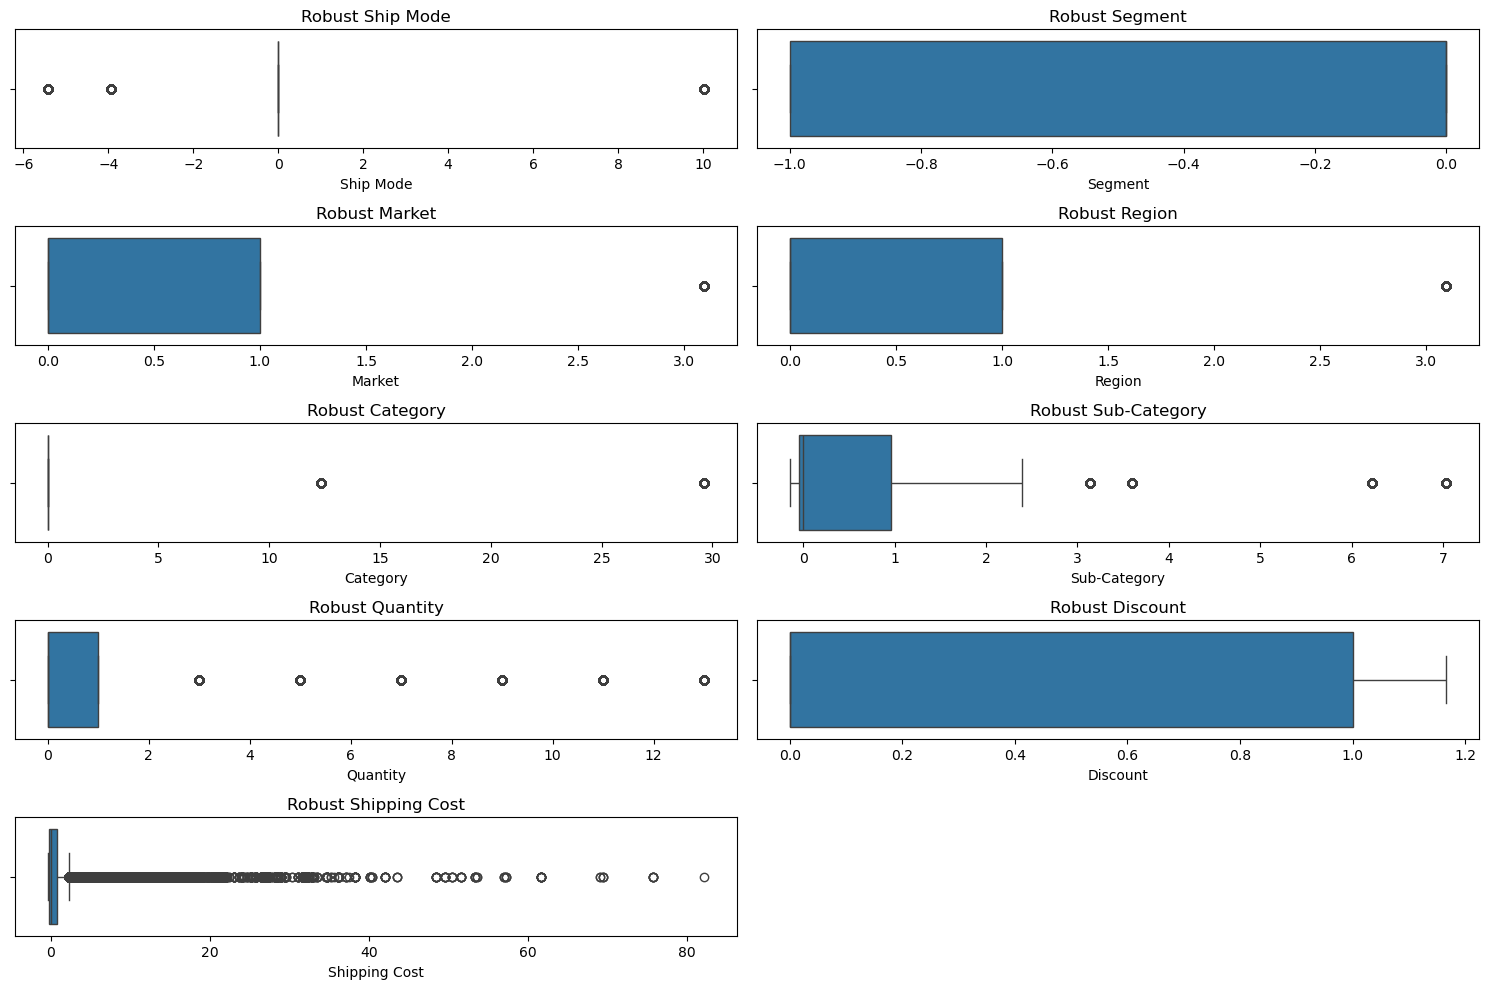

In [16]:
boxplot_scaler(df,cols_escalar,"Robust")

# Guardamos

In [17]:
df.to_pickle("../../../datos/02_regresiones/cluster_1/04_datos_robust_scaler.pkl")